EYE FOR BLIND

This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import keras
import glob
import random as rn
rn.seed(42)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(42)

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import string
import json
from tqdm import tqdm
import time
from tensorflow.python.client import device_lib
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', 100)

In [3]:
# Mounting Google Drive
from google.colab import drive
#mount the drive in google colab

Mounted at /content/drive


In [4]:
#Import the libraries
import zipfile
import os
#give the path to your drive)
#Opens the zip file in read mode
zip_ref.extractall('/tmp')
#Extracts the files into the /tmp folder
zip_ref.close()

Let's read the dataset

**Data understanding**

1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions

In [5]:
#Import the dataset and read the image into a seperate variable
image_folder ='/tmp/Images/'

all_imgs = glob.glob(image_folder + '*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


In [6]:
#Visualise both the images & text present in the dataset
text_file_path = '/tmp/captions.txt'
image_captions_df = pd.read_csv(text_file_path)
image_captions_df.head(10)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


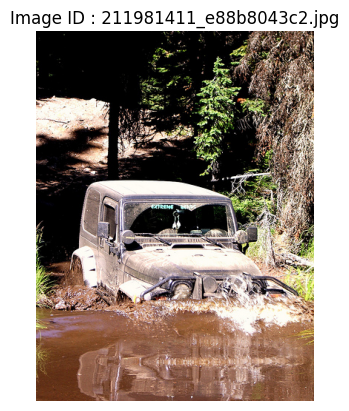

Image Shape :  (500, 375, 3) 

Captions for Image ID #  211981411_e88b8043c2.jpg  : 
['A hummer is driving through a mud puddle several feet deep .'
 'An old dusty car is half way in the brown water .'
 'An old jeep partially submerged in water' 'Dirty car in body of water'
 'The dirty vehicle is caught in a flood .'] 




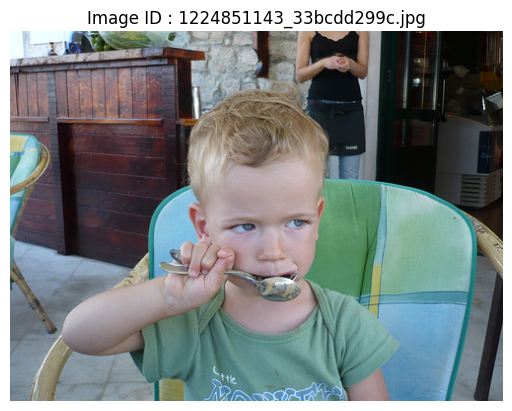

Image Shape :  (375, 500, 3) 

Captions for Image ID #  1224851143_33bcdd299c.jpg  : 
['A boy eats with a spoon .'
 'A little boy holds a spoon up to his mouth .'
 'A little boy is eating his food off of a spoon while sitting on a patio .'
 'A small child dressed in green is eating with a spoon .'
 'A young child holds a spoon to its mouth while sitting in a chair .'] 




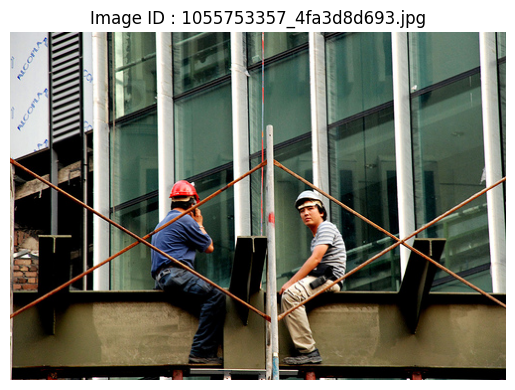

Image Shape :  (351, 500, 3) 

Captions for Image ID #  1055753357_4fa3d8d693.jpg  : 
['Two constructions workers sit on a beam taking a break .'
 'Two construction workers are sitting up on the side of a building .'
 'Two construction workers sitting on an I-beam .'
 'Two construction workers take a seat on a steel beam .'
 'Two men take a break from construction .'] 




In [7]:
#Visualising three random images & captions present in the dataset

for i in range(3) :
    # image
    random_index = rn.randint(0,len(all_imgs))
    image_id = image_captions_df.loc[random_index,'image']
    image = plt.imread(image_folder + image_id)
    plt.title('Image ID : ' +image_id )
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print('Image Shape : ', image.shape,'\n')

    # captions
    condition = image_captions_df['image'] == image_id
    print('Captions for Image ID # ', image_id , ' : ')
    print(image_captions_df.loc[condition,'caption'].values, '\n\n')

Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [8]:
# Creating a dataframe which summarizes the image, path & captions as a dataframe

all_img_id= image_captions_df['image'].values #storing all the image ids
all_img_vector= (image_folder + '/'+ image_captions_df['image']).values  #storing all the image paths
annotations= image_captions_df['caption'].values #storing all the captions

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions'])
pd.set_option('max_colwidth', 100)

print('No of samples : ', df.shape[0])
df.head(10)

No of samples :  40455


,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,/tmp/Images//1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1,1000268201_693b08cb0e.jpg,/tmp/Images//1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,/tmp/Images//1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,/tmp/Images//1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
4,1000268201_693b08cb0e.jpg,/tmp/Images//1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
5,1001773457_577c3a7d70.jpg,/tmp/Images//1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,/tmp/Images//1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .
7,1001773457_577c3a7d70.jpg,/tmp/Images//1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .
8,1001773457_577c3a7d70.jpg,/tmp/Images//1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .
9,1001773457_577c3a7d70.jpg,/tmp/Images//1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


Each image id has 5 captions associated with it therefore the total dataset has 40455 samples.

A soccer player in red uniform runs after a soccer ball .


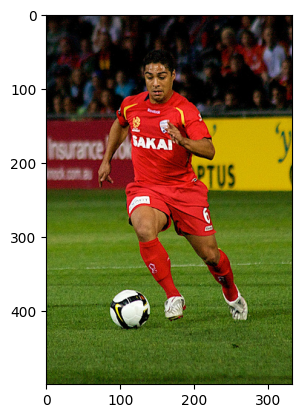

In [9]:
# Reading a random image from dataframe
row = rn.randint(0,df.shape[0])
image = plt.imread(df.loc[row,'Path'])
plt.imshow(image)

print(df.loc[row,'Captions'])

In [10]:
#Creating the vocabulary & the counter for the captions

# Removing all punctuations from captions
df['Captions'] = df['Captions'].apply(lambda x : ''.join(l for l in x if l not in string.punctuation))

vocabulary= [y.lower() for x in df['Captions'].values for y in x.split()]

val_count=Counter(vocabulary)
val_count.most_common(30)

[('a', 62986),
 ('in', 18974),
 ('the', 18418),
 ('on', 10743),
 ('is', 9345),
 ('and', 8851),
 ('dog', 8136),
 ('with', 7765),
 ('man', 7265),
 ('of', 6713),
 ('two', 5638),
 ('white', 3940),
 ('black', 3832),
 ('boy', 3581),
 ('are', 3504),
 ('woman', 3402),
 ('girl', 3328),
 ('to', 3173),
 ('wearing', 3062),
 ('at', 2914),
 ('people', 2883),
 ('water', 2783),
 ('red', 2672),
 ('young', 2630),
 ('brown', 2563),
 ('an', 2432),
 ('his', 2357),
 ('blue', 2268),
 ('dogs', 2125),
 ('running', 2073)]

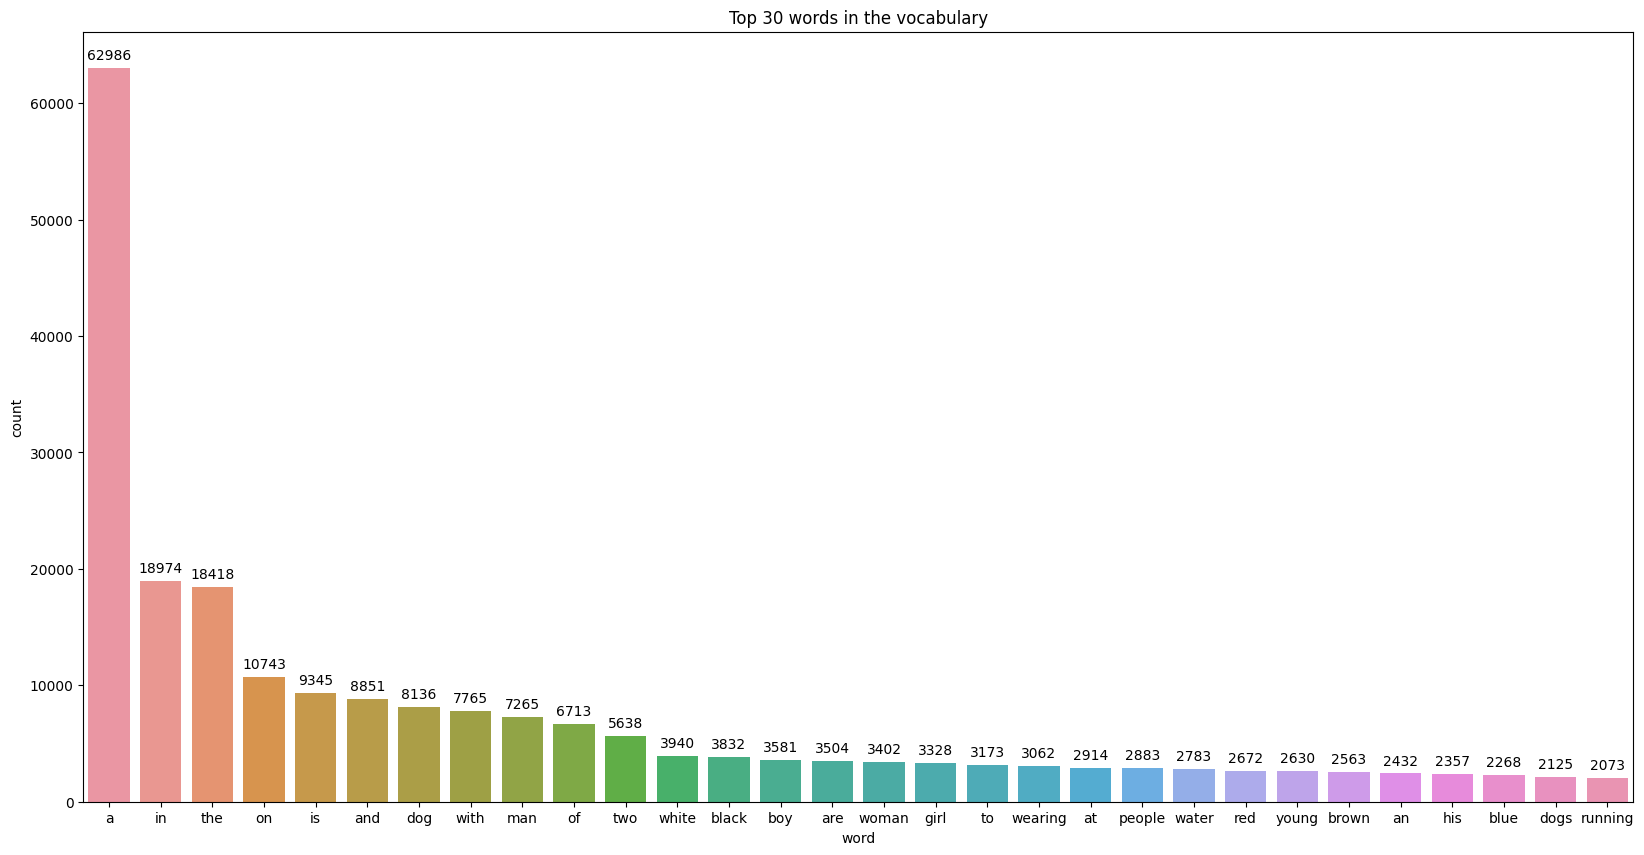

In [11]:
#Visualising the top 30 occuring words in the captions
top30 = val_count.most_common(30)

words = []
counts = []
for word_count in top30 :
    words.append(word_count[0])
    counts.append(word_count[1])

plt.figure(figsize=(20,10))
plt.title('Top 30 words in the vocabulary')
plt.xlabel('word')
plt.ylabel('count')
plot = sns.barplot(x=words, y=counts)
for p in plot.patches:
    plot.annotate(format(int(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.show()

In [12]:
#Creating a list which contains all the captions and adding the <start> & <end> token to all those captions.
annotations= (df['Captions'].apply(lambda x : '<start> '+ x + ' <end>')).values

#Creating a list which contains all the path to the images
all_img_path= df['Path'].values

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


**Pre-Processing the captions**

1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [50]:
# creating the tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer (
num_words = 5000,
filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ',
lower = True,
split = " ",
char_level = False,
oov_token = '<unk>',)

# fitting the tokenizer on words in the dataset
tokenizer.fit_on_texts(annotations)

# Converting sentences to sequences of word token indexes
caption_sequences = tokenizer.texts_to_sequences(annotations)
caption_sequences[:10]

[[3, 2, 43, 5, 2, 91, 171, 8, 120, 54, 2, 396, 13, 393, 5, 29, 1, 694, 4],
 [3, 2, 20, 315, 65, 2, 195, 118, 4],
 [3, 2, 41, 20, 120, 65, 2, 195, 2432, 4],
 [3, 2, 41, 20, 120, 6, 393, 21, 61, 2432, 4],
 [3, 2, 41, 20, 5, 2, 91, 171, 315, 65, 2, 195, 2995, 4],
 [3, 2, 16, 10, 9, 2, 853, 10, 18, 344, 4],
 [3, 2, 16, 10, 9, 2, 1563, 10, 35, 11, 138, 83, 7, 6, 156, 4],
 [3, 2, 16, 10, 9, 2, 15, 10, 11, 28, 998, 18, 638, 23, 138, 83, 5, 6, 73, 4],
 [3, 14, 32, 13, 739, 2650, 89, 23, 138, 83, 7, 6, 156, 4],
 [3, 14, 32, 7, 721, 797, 320, 138, 83, 4]]

In [14]:
# Creating word-to-index and index-to-word mappings.
word2index = json.loads(tokenizer.get_config()['word_index'])
index2word = json.loads(tokenizer.get_config()['index_word'])

index2word = {int(key) : value for key,value in index2word.items()}

print('Index for the word ',"<start> is", word2index["<start>"])
print('Word for the index : 3 is ', index2word[3])

Index for the word  <start> is 3
Word for the index : 3 is  <start>


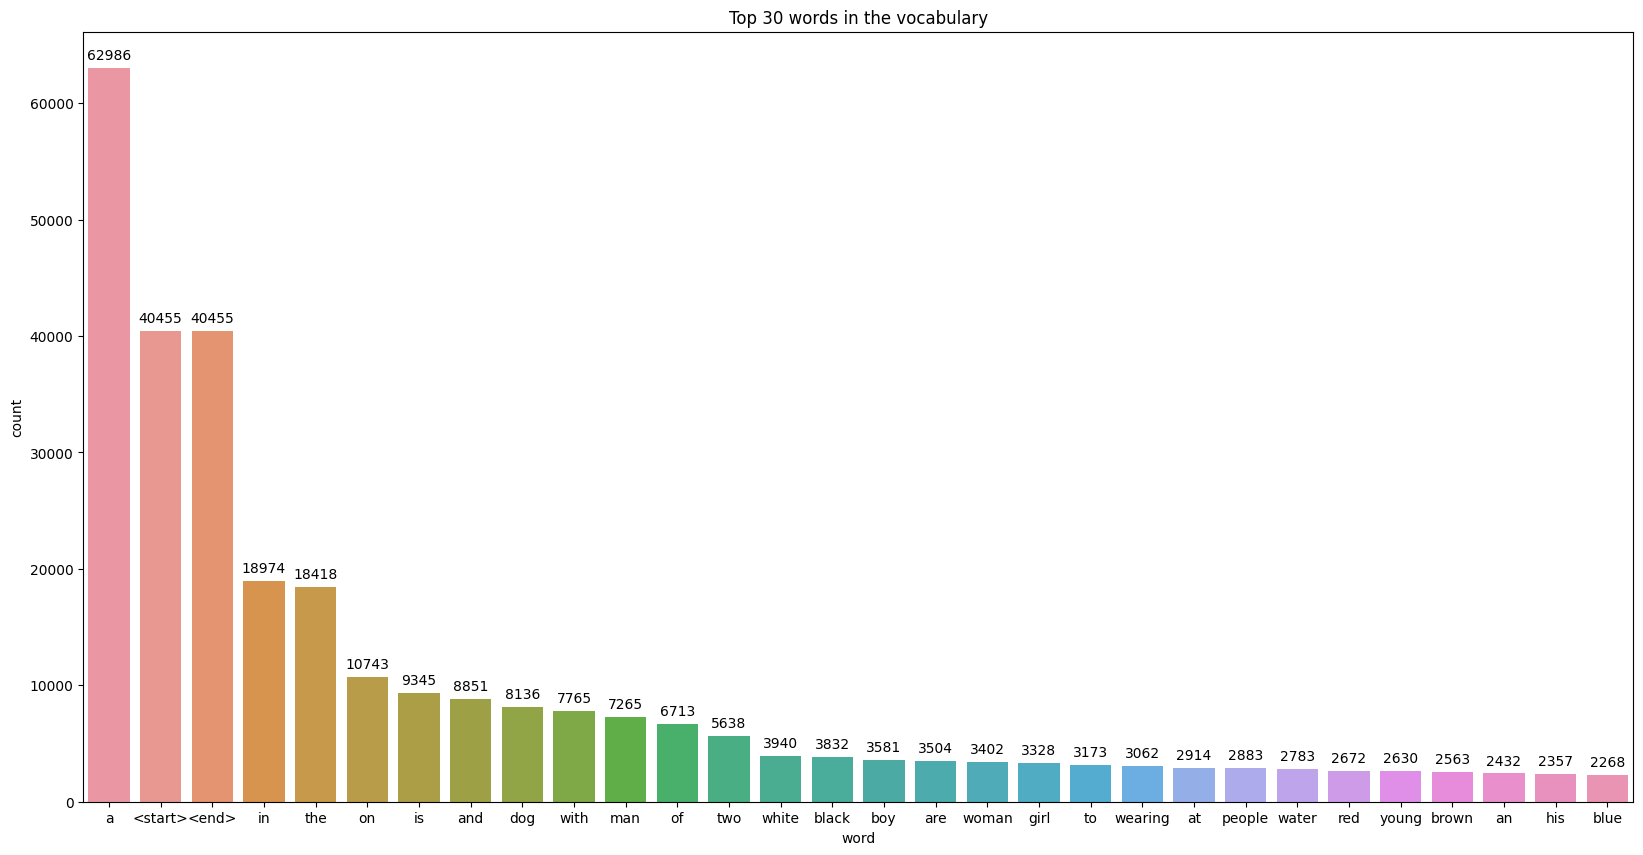

In [15]:
# Creating a word count of the tokenizer to visulize the Top 30 occuring words after text processing

word_counts = tokenizer.get_config()['word_counts']

word_counts_df = pd.DataFrame.from_dict(data = json.loads(word_counts), orient='index', columns=['count'])
top_30 = word_counts_df.sort_values(by='count', ascending=False)[:30]


plt.figure(figsize=(20,10))
plt.title('Top 30 words in the vocabulary')
plt.xlabel('word')
plt.ylabel('count')
plot = sns.barplot(x=top_30.index , y=top_30['count'])
for p in plot.patches:
    plot.annotate(format(int(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.show()

In [16]:
# Padding each vector to the max_length of the captions and storing it to a vairable

max_length = max([len(caption_sequence) for caption_sequence in caption_sequences])
print('Max Length of Caption :', max_length)

# padding all caption sequences.
cap_vector =  tf.keras.preprocessing.sequence.pad_sequences(
    caption_sequences, padding="post"
)

print("The shape of Caption vector is :" + str(cap_vector.shape))

Max Length of Caption : 38
The shape of Caption vector is :(40455, 38)


In [17]:
# Adding padding index to tokenizer
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

**Pre-processing the images**

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3.

**FAQs on how to resize the images::**

Since you have a list which contains all the image path, you need to first convert them to a dataset using tf.data.Dataset.from_tensor_slices. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image.
This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.

In [18]:
#write your code here for creating the function. This function should return images & their path

def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

# Check the preprocessing Logic
print(f'Size of image before preprocessing: {mpimg.imread(all_img_vector[0]).shape}')
print(f'Size of image after preprocessing: {preprocess_image(all_img_vector[0])[0].shape}')

Size of image before preprocessing: (500, 375, 3)
Size of image after preprocessing: (299, 299, 3)


In [19]:
#write your code here for applying the function to the image path dataset, such that the transformed dataset should contain images & their path

unique_img_vector = sorted (set(all_img_vector))
image_dataset = tf.data.Dataset.from_tensor_slices(unique_img_vector)
image_dataset = image_dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                .batch(64)
image_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

**Load the pretrained Imagenet weights of Inception net V3**

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048.

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)

In [20]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input#write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output#write code here to get the output of the image_model

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)#build the final model using both input & output layer

87910968/87910968 [==============================] - 5s 0us/step


In [21]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [22]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)

from tqdm import tqdm
for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

100%|██████████| 127/127 [01:14<00:00,  1.69it/s]


**FAQs on how to store the features:**

You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
You can store using numpy(np.save) to store the resulting vector.

**Dataset creation**

1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature.

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)

In [23]:
#write your code here

path_train, path_test, cap_train, cap_test = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=42)

In [24]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [25]:
# Create a function which maps the image path to their feature.
# This function will take the image_path & caption and return it's feature & respective caption.

def map_func(image, caption):
  img_tensor = np.load(image.decode('utf-8')+'.npy') # write your code here to extract the features from the dictionary stored earlier
  return img_tensor,caption

FAQs on how to load the features:

You can load the features using the dictionary created earlier OR You can store using numpy(np.load) to load the feature vector.

In [26]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

def gen_dataset(image, caption,batch_size = 32,buffer_size=1000):

    dataset = tf.data.Dataset.from_tensor_slices((image, caption))

    # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
            map_func, [item1, item2], [tf.float32, tf.int32]),
            num_parallel_calls=tf.data.AUTOTUNE)

    # Shuffle and batch
    dataset = dataset.shuffle(buffer_size).batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

In [27]:
BATCH_SIZE = 64

train_dataset=gen_dataset(path_train,cap_train,BATCH_SIZE)
test_dataset=gen_dataset(path_test,cap_test,BATCH_SIZE)

In [28]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 38)


**Model Building**


1.Set the parameters

2.Build the Encoder, Attention model & Decoder




**Hyperparameters**

In [29]:
embedding_dim = 256
units = 512
vocab_size = 5001#top 5,000 words +1
train_num_steps = len(path_train) // BATCH_SIZE
test_num_steps = len(path_test) // BATCH_SIZE

In [30]:
train_num_steps

505

Encoder


Defining the CNN based encoder using Keras Subclassing.

This will work based on the input image embeddings from the InceptionV3 network.

In [31]:
class Encoder(tf.keras.Model):
    def __init__(self,embed_dim = 256):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim)#build your Dense layer with relu activation

    def call(self, features):
        features =  self.dense(features)# extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.nn.relu(features)
        return features

In [32]:
encoder=Encoder(embedding_dim)

Attention model



Defining the attention mechanism to look at the input sequences.

In [33]:
class Attention_model(tf.keras.Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)#build your Dense layer
        self.W2 = tf.keras.layers.Dense(units)#build your Dense layer
        self.V = tf.keras.layers.Dense(1)#build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis =  tf.expand_dims(hidden,1)# Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        # attention_hidden_layer shape == (batch_size, 64, units)
        attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                            self.W2(hidden_with_time_axis)))
        score = self.V(attention_hidden_layer)# build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  tf.nn.softmax(score,axis=1)# extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector =  attention_weights * features#shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector =  tf.reduce_sum(context_vector, axis=1)# reduce the shape to (batch_size, embedding_dim)


        return context_vector, attention_weights

Decoder

Defining the RNN based decoder which will also leverage the attention mechanism.

In [34]:
class Decoder(tf.keras.Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)#iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embedding_dim)#build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units)#build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size)#build your Dense layer


    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)#create your context vector & attention weights from attention model
        embed =  self.embed(x)# embed your input to shape: (batch_size, 1, embedding_dim)
        embed =  tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)# Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed)# Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)

        return output,state, attention_weights

    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [35]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [36]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


Model training & optimization

1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [37]:
optimizer = tf.keras.optimizers.Adam()

#define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')#define your loss object

In [38]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [39]:
# checkpoint_path = "./checkpoints/train"
checkpoint_path = os.path.join("checkpoints","train")
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [40]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

While creating the training step for your model, you will apply Teacher forcing. Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [41]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        features = encoder(img_tensor)
        for i in range(1,target.shape[1]):
            predictions,hidden,_ = decoder(dec_input,features,hidden)
            loss += loss_function(target[:,i], predictions)
            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)

        avg_loss = (loss / int(target.shape[1]))
        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, avg_loss

While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [42]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
    #write your code here to do the training steps
        features = encoder(img_tensor)
        for i in range(1,target.shape[1]):
            predictions,hidden,_ = decoder(dec_input,features,hidden)
            loss += loss_function(target[:,i], predictions)
            predicted_id = tf.argmax(predictions,1)
            dec_input = tf.expand_dims(predicted_id, 1)

    avg_loss = (loss / int(target.shape[1]))

    return loss, avg_loss

In [43]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch,(img_tensor,target)) in enumerate(test_dataset):
        batch_loss,t_loss = test_step(img_tensor,target)
        total_loss += t_loss
    return total_loss/test_num_steps

Train Loop

In [44]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100

with tf.device('/GPU:0'):
    for epoch in range(start_epoch, EPOCHS):
        print('EPOCH :',epoch+1,' of ', EPOCHS)
        start = time.time()
        total_loss = 0

        for (batch, (img_tensor, target)) in enumerate(tqdm(train_dataset)):

            batch_loss, t_loss = train_step(img_tensor, target)
            total_loss += t_loss

        avg_train_loss=total_loss / train_num_steps

        loss_plot.append(avg_train_loss)
        test_loss = test_loss_cal(test_dataset)
        test_loss_plot.append(test_loss)

        print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
        print ('Time taken for 1 epoch {:.3f} sec\n'.format(time.time() - start))

        if test_loss < best_test_loss:
            print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
            best_test_loss = test_loss
            ckpt_manager.save()

EPOCH : 1  of  15


100%|██████████| 506/506 [02:53<00:00,  2.92it/s]


For epoch: 1, the train loss is 1.277, & test loss is 1.972
Time taken for 1 epoch 224.665 sec

Test loss has been reduced from 100.000 to 1.972
EPOCH : 2  of  15


100%|██████████| 506/506 [01:27<00:00,  5.81it/s]


For epoch: 2, the train loss is 0.994, & test loss is 1.960
Time taken for 1 epoch 110.106 sec

Test loss has been reduced from 1.972 to 1.960
EPOCH : 3  of  15


100%|██████████| 506/506 [01:47<00:00,  4.69it/s]


For epoch: 3, the train loss is 0.905, & test loss is 1.929
Time taken for 1 epoch 133.633 sec

Test loss has been reduced from 1.960 to 1.929
EPOCH : 4  of  15


100%|██████████| 506/506 [01:39<00:00,  5.06it/s]


For epoch: 4, the train loss is 0.843, & test loss is 1.981
Time taken for 1 epoch 124.999 sec

EPOCH : 5  of  15


100%|██████████| 506/506 [01:47<00:00,  4.71it/s]


For epoch: 5, the train loss is 0.792, & test loss is 2.030
Time taken for 1 epoch 133.016 sec

EPOCH : 6  of  15


100%|██████████| 506/506 [01:48<00:00,  4.68it/s]


For epoch: 6, the train loss is 0.746, & test loss is 2.039
Time taken for 1 epoch 136.751 sec

EPOCH : 7  of  15


100%|██████████| 506/506 [01:49<00:00,  4.62it/s]


For epoch: 7, the train loss is 0.704, & test loss is 2.047
Time taken for 1 epoch 138.477 sec

EPOCH : 8  of  15


100%|██████████| 506/506 [01:54<00:00,  4.43it/s]


For epoch: 8, the train loss is 0.667, & test loss is 2.138
Time taken for 1 epoch 143.839 sec

EPOCH : 9  of  15


100%|██████████| 506/506 [01:50<00:00,  4.59it/s]


For epoch: 9, the train loss is 0.631, & test loss is 2.132
Time taken for 1 epoch 138.784 sec

EPOCH : 10  of  15


100%|██████████| 506/506 [01:51<00:00,  4.54it/s]


For epoch: 10, the train loss is 0.597, & test loss is 2.207
Time taken for 1 epoch 136.708 sec

EPOCH : 11  of  15


100%|██████████| 506/506 [01:41<00:00,  5.00it/s]


For epoch: 11, the train loss is 0.566, & test loss is 2.303
Time taken for 1 epoch 126.568 sec

EPOCH : 12  of  15


100%|██████████| 506/506 [01:44<00:00,  4.83it/s]


For epoch: 12, the train loss is 0.538, & test loss is 2.314
Time taken for 1 epoch 134.684 sec

EPOCH : 13  of  15


100%|██████████| 506/506 [01:54<00:00,  4.40it/s]


For epoch: 13, the train loss is 0.510, & test loss is 2.419
Time taken for 1 epoch 143.417 sec

EPOCH : 14  of  15


100%|██████████| 506/506 [01:48<00:00,  4.66it/s]


For epoch: 14, the train loss is 0.485, & test loss is 2.505
Time taken for 1 epoch 137.550 sec

EPOCH : 15  of  15


100%|██████████| 506/506 [01:56<00:00,  4.33it/s]


For epoch: 15, the train loss is 0.463, & test loss is 2.584
Time taken for 1 epoch 144.712 sec



Visualize the Loss Curves

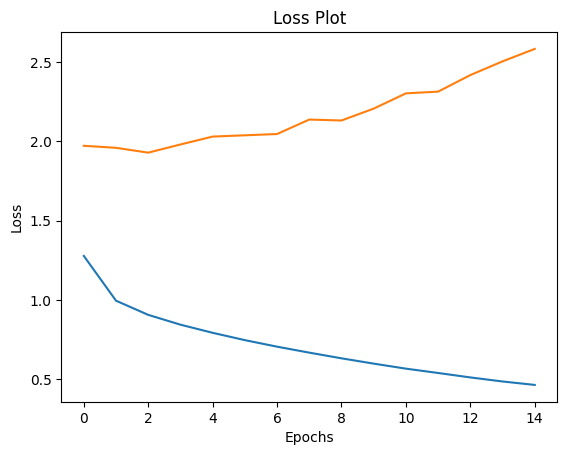

In [45]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

**NOTE: **Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different. Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model.

**Model Evaluation**

1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

Greedy Search

In [56]:
attention_features_shape = 64

def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input)# Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()#extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id])
        #map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

Beam Search(optional)

In [55]:
def beam_evaluate(image, beam_index = 3):

    #write your code to evaluate the result using beam search
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        temp = []
        for i, s in enumerate(result):
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            word_preds = np.argsort(predictions[0])[-beam_index:]

            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)

                prob += np.log(predictions[0][w])

                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]


        predicted_id = result[-1]
        pred_list = predicted_id[0]

        prd_id = pred_list[-1]
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)
        else:
            break


    result2 = result[-1][0]

    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)

        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption

Evaluate using Beam Search

a young toddler in a blonde child in the dress is puddle


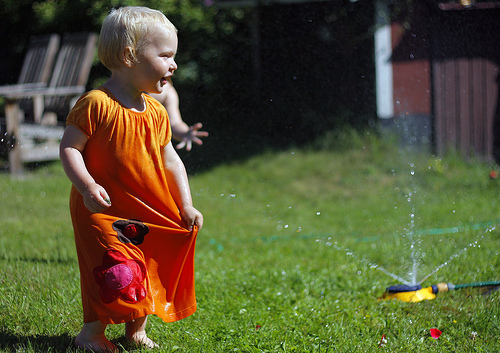

In [70]:
from PIL import Image
test_image = "/tmp/Images/3767841911_6678052eb6.jpg"

captions=beam_evaluate(test_image)
print(captions)
Image.open (test_image)

Visualize the attention while Caption Generation

In [61]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))

    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))

        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)

        img=ax.imshow(temp_img)

        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [62]:
from nltk.translate.bleu_score import sentence_bleu

In [63]:
def filt_text(text):
    filt=['<start>','<unk>','<end>']
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [64]:
def test_caption_generation(img_test):


    rid = np.random.randint(0, len(img_test))
    test_image = img_test[rid]
    #test_image = './images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join(
        tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]
    )

    result, attention_plot,pred_test = evaluate(test_image)


    real_caption=filt_text(real_caption)


    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = [real_caption.split()]
    reference = real_appn
    candidate = pred_caption.split()

    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)

    score1 = sentence_bleu(reference, candidate, weights=(1,0,0,0))
    score2 = sentence_bleu(reference, candidate, weights=(0,1,0,0))
    score3 = sentence_bleu(reference, candidate, weights=(0,0,1,0))
    score4 = sentence_bleu(reference, candidate, weights=(0,0,0,1))
    print("\nBLEU score: ")
    print(f"Individual 1-gram: {score1*100}")
    print(f"Individual 2-gram: {score2*100}")
    print(f"Individual 3-gram: {score3*100}")
    print(f"Individual 4-gram: {score4*100}")

    plot_attmap(result, attention_plot, test_image)


    Image.open(test_image)

Real Caption: young girl in red graduation suit flings her hat upward into the field
Prediction Caption: man throws flaming graduation cap

BLEU score: 
Individual 1-gram: 4.037930359893108
Individual 2-gram: 4.49234664313549e-307
Individual 3-gram: 4.49234664313549e-307
Individual 4-gram: 4.49234664313549e-307


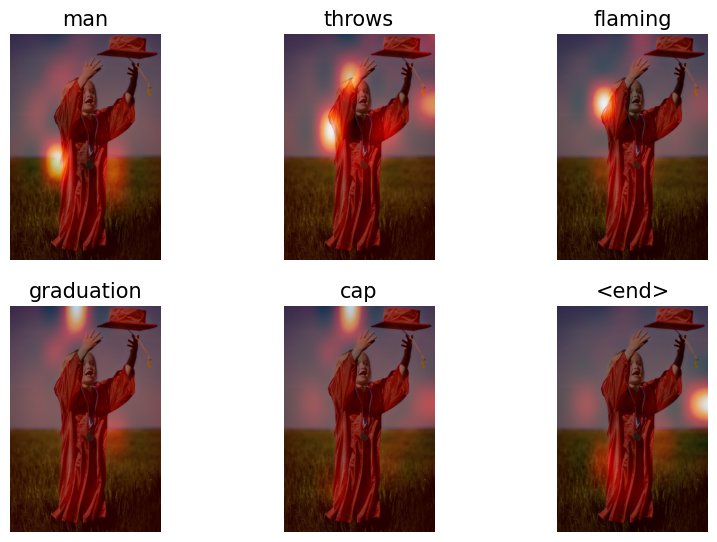

In [65]:
test_caption_generation(path_test)

Evaluation with Unseen Data

In [66]:
def Prediction_Unknown_data(test_image):
    #Testing on test image
    openImg = test_image
    result, attention_plot,pred_test = evaluate(test_image)
    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    candidate = pred_caption.split()

    print ('Prediction Caption:', pred_caption)
    print ('')
    newsize = (800, 800)
    im = Image.open(openImg).resize(newsize)
    width, height = im.size
    print(width,height)
    div=3
    if width > 3000:
        div=10
    im = im.resize((width//div, height//div))

    return im

Prediction Caption: a dog turns around a beach

800 800


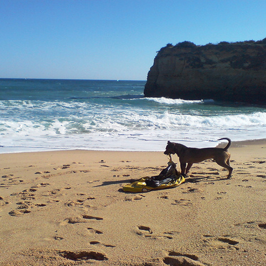

In [69]:
Prediction_Unknown_data(path_test[65])